In [ ]:
install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quantmod’, ‘tseries’


Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”


In [ ]:
library(tseries)
library(readr)
library(mgcv)
library(tidyverse)
library(lubridate)
library(stringr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.9
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks nlme::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Importing and reading the data file

In [1]:
datafile <- read.csv('/content/non_seasonal_CSV.csv')

Checking the column names. 

In [2]:
names(datafile)

[1] "year"            "total_marriages" "total_briths"

Plotting the data (number of births in Ireland) against time (years from 2009 to 2019)

In [3]:
values = datafile[3]

[1] 1

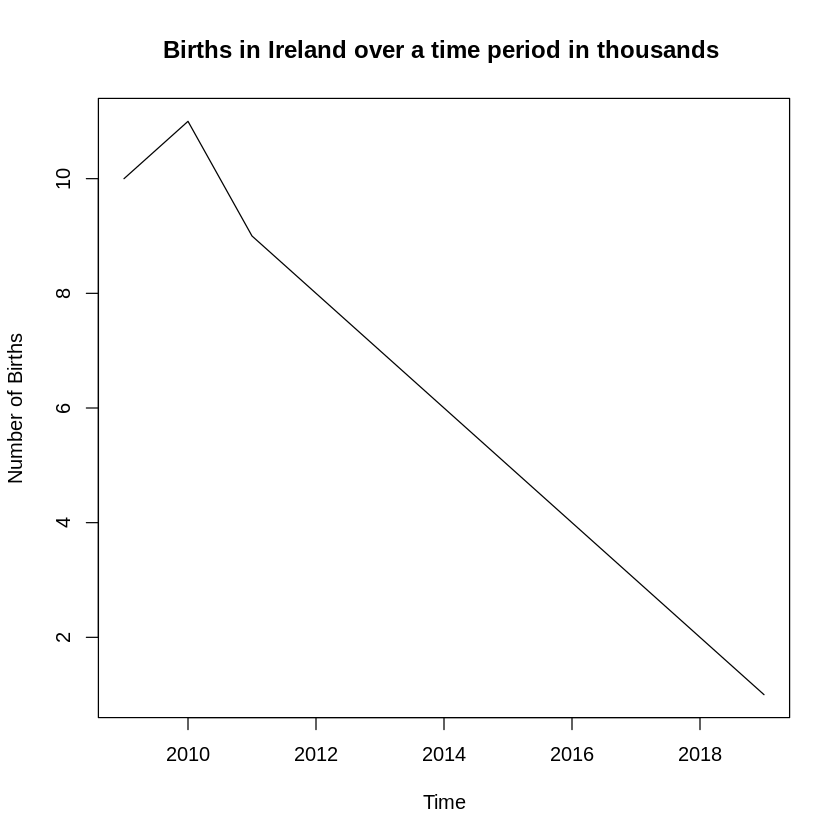

In [5]:
values = ts(values, start=2009, end=2019, frequency=1)
ts.plot(values, main="Births in Ireland over a time period in thousands ", ylab="Number of Births", type="l")
1


Print the values

In [4]:
values

total_briths
<chr>
"74,928"
"74,976"
"74,650"
"72,225"
"68,930"
"67,462"
"65,909"
"63,897"
"62,053"


Make sure the start and end values are correct

In [ ]:
start(values)

[1] 2009    1

In [ ]:
end(values)

[1] 2019    1

In [ ]:
values.holdout <- window(values, start=2009, end=2019)
values <- window(values, end=2008)

ERROR: ignored

Plotting a time series of births in Ireland over a ten year period between (2009-2019)

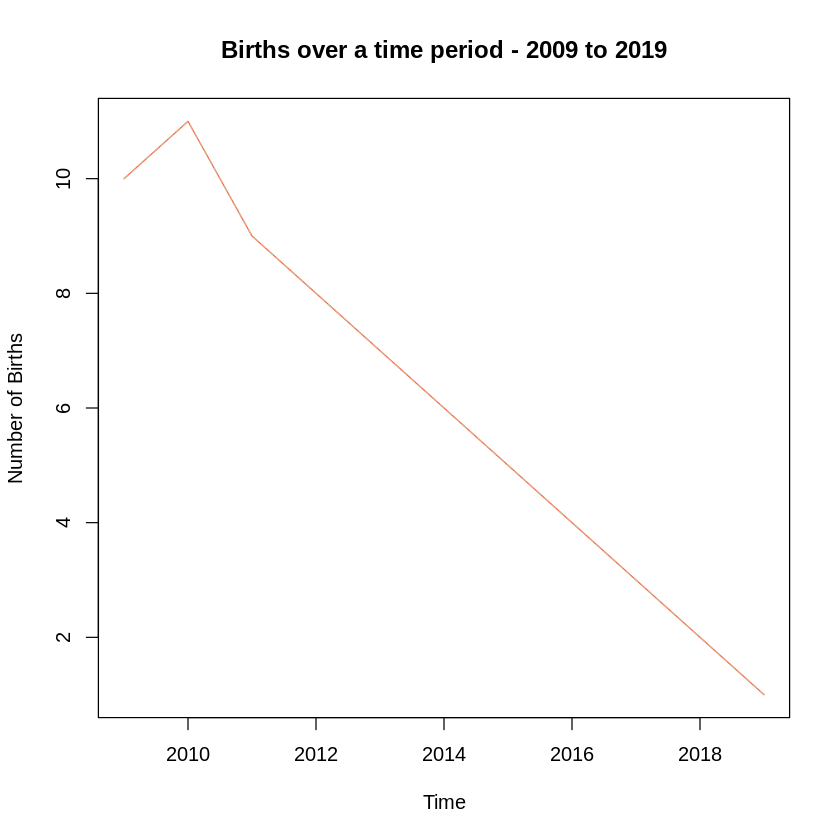

In [ ]:
ts.plot(cbind(values, values.holdout), main="Births over a time period - 2009 to 2019 in thousands",
ylab="Number of Births", type="l", col=c("tomato", "tan"), lty=c(1, 2))

We can see from the graph that the total births over this time period is decreasing year on year 

Use the Augmented Dickey-Fuller Test to test the stationarity of the time series. A p-Value of less than 0.05 in adf.test() indicates that it is stationary. 

In [ ]:
library(tseries)
adf.test(values)

Warning message in summary.lm(res):
“essentially perfect fit: summary may be unreliable”



	Augmented Dickey-Fuller Test

data:  values
Dickey-Fuller = -1.8874, Lag order = 2, p-value = 0.6153
alternative hypothesis: stationary


Smoothing the data

In [ ]:
time.pts = c(1:length(values))
time.pts = c(time.pts - min(time.pts))/max(time.pts)

In [ ]:
mav.fit = ksmooth(time.pts, values, kernel = "box")

In [ ]:
head(mav.fit$y,20)

[1] 10.0 10.0 10.0  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.5  9.0  9.0
[16]  9.0  9.0  9.0  9.0  9.0

In [ ]:
values.fit.mav = ts(mav.fit$y,start=2009,frequency=10)

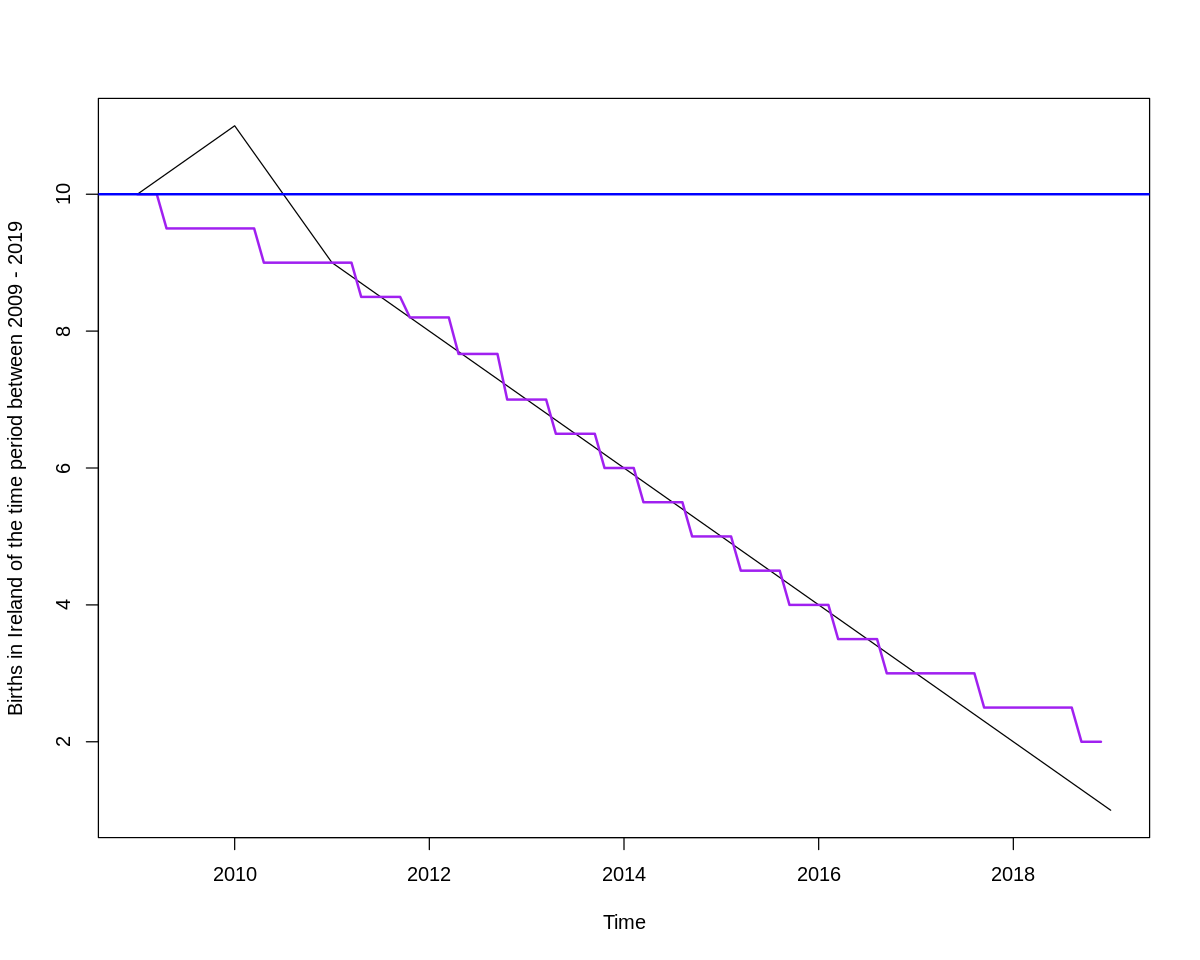

In [ ]:
ts.plot(values,ylab="Births in Ireland of the time period between 2009 - 2019")
lines(values.fit.mav,lwd=2,col="purple")
abline(values.fit.mav[1],0,lwd=2,col="blue")

Parametric regression

In [ ]:
x1 = time.pts
x2 = time.pts^2

In [ ]:
lm.fit = lm(values~x1+x2)
summary(lm.fit)


Call:
lm(formula = values ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79720 -0.09441 -0.04476  0.02168  1.09930 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.7972     0.3709  29.108  2.1e-09 ***
x1           -9.7462     1.8984  -5.134 0.000892 ***
x2           -1.2692     2.0113  -0.631 0.545608    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4869 on 8 degrees of freedom
Multiple R-squared:  0.9828,	Adjusted R-squared:  0.9784 
F-statistic:   228 on 2 and 8 DF,  p-value: 8.836e-08


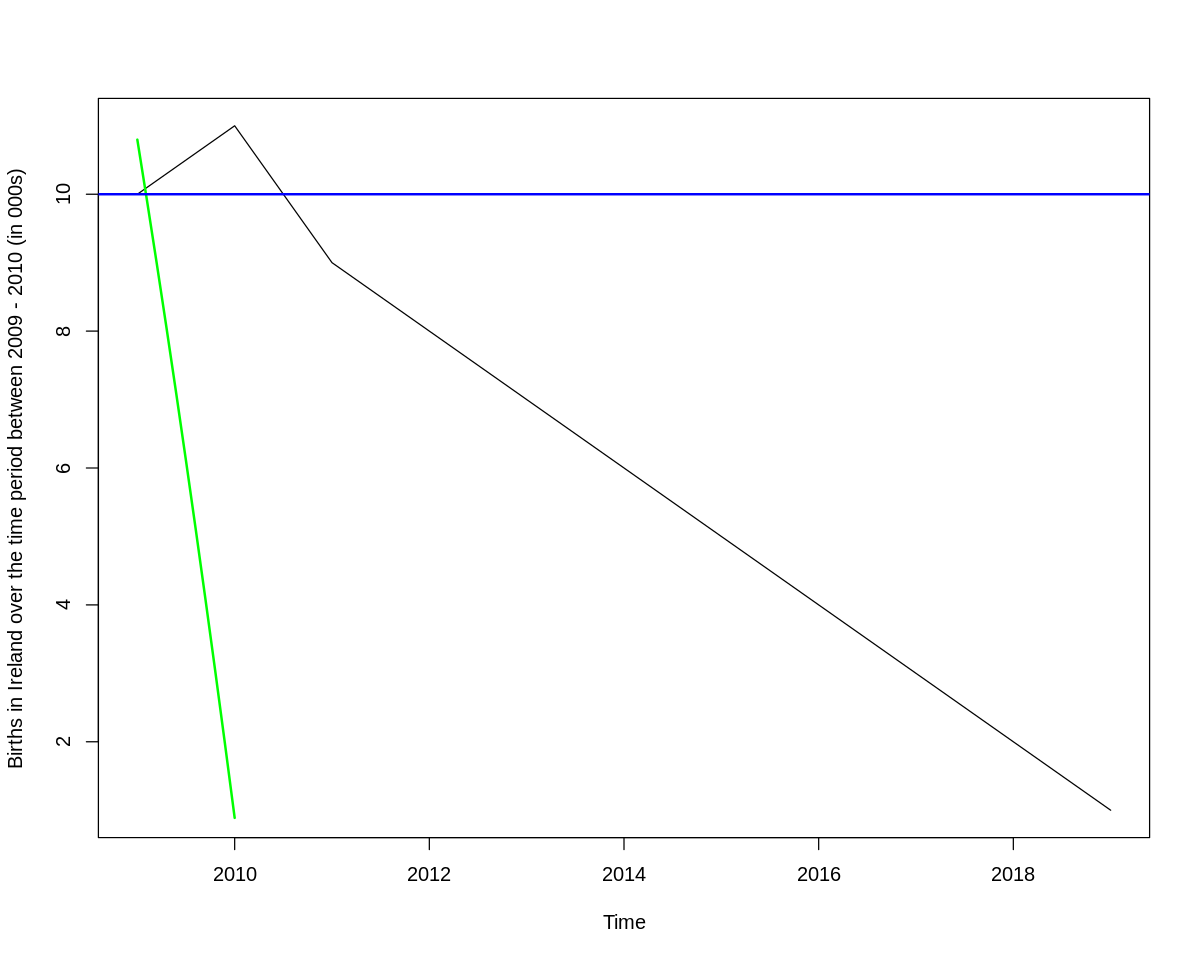

In [ ]:
values.fit.lm = ts(fitted(lm.fit),start=2009,frequency=10)

ts.plot(values,ylab="Births in Ireland over the time period between 2009 - 2010 (in 000s)")
lines(values.fit.lm,lwd=2,col="green")
abline(values.fit.mav[1],0,lwd=2,col="blue")

In [ ]:
loc.fit = loess(values~time.pts)
values.fit.loc = ts(fitted(loc.fit),start=2009,frequency=10)

trying to estimate using splines trend estimation

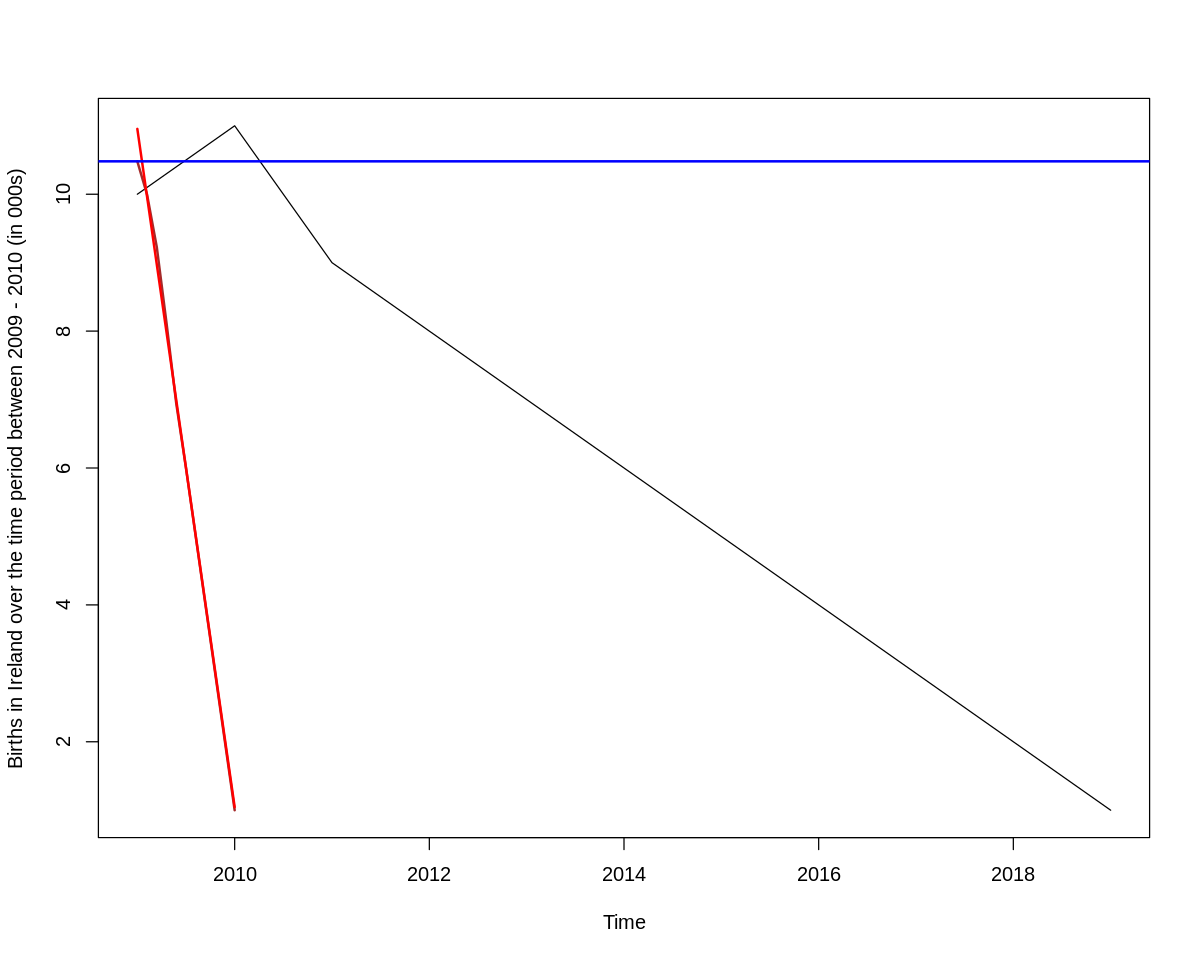

In [ ]:
gam.fit = gam(values~s(time.pts))
values.fit.gam = ts(fitted(gam.fit),start=2009,frequency=10)

ts.plot(values,ylab="Births in Ireland over the time period between 2009 - 2010 (in 000s)")
lines(values.fit.loc,lwd=2,col="brown")
lines(values.fit.gam,lwd=2,col="red")
abline(values.fit.loc[1],0,lwd=2,col="blue")

Comparing all of the forecasts together

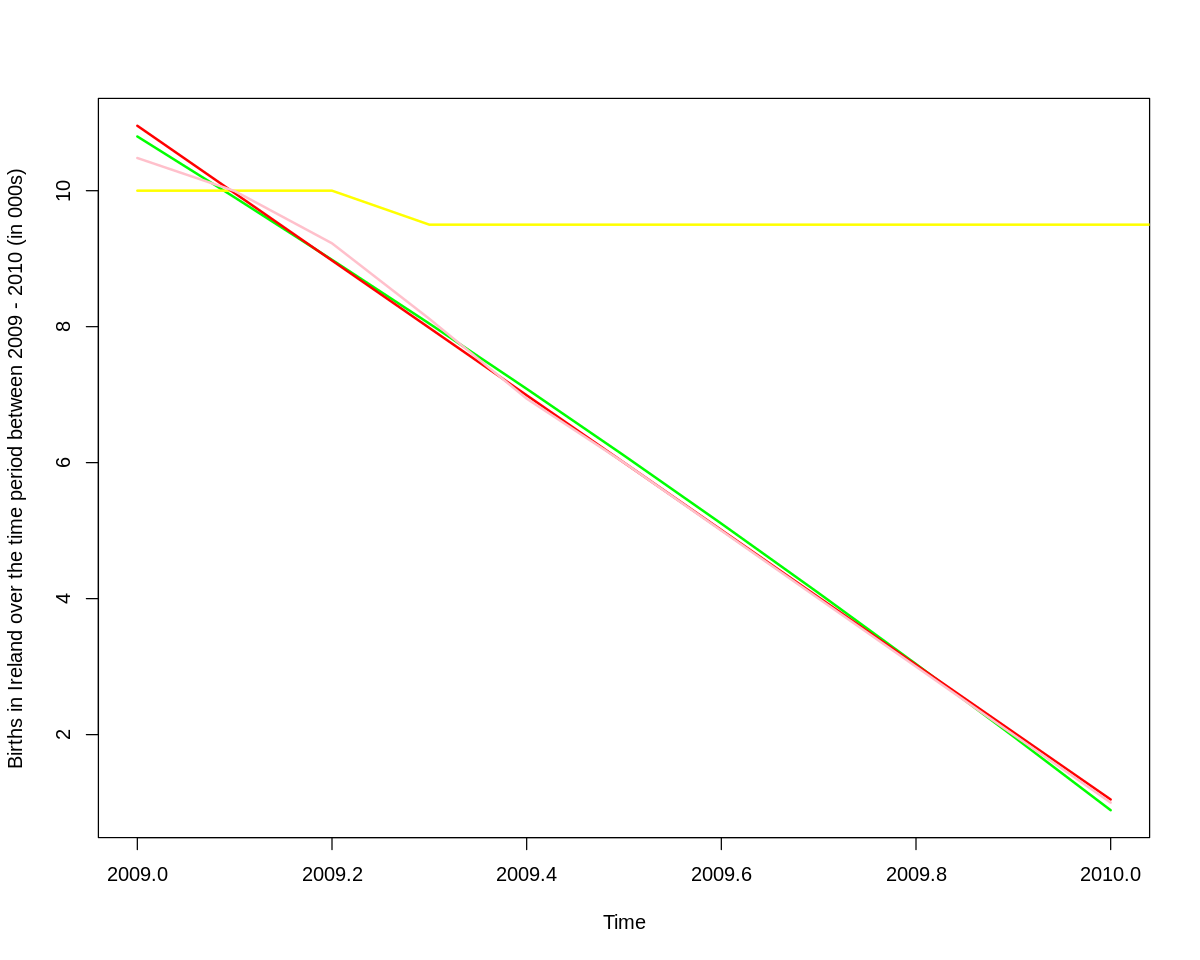

In [ ]:
all.val = c(values.fit.mav,values.fit.lm,values.fit.gam,values.fit.loc)
ylim= c(min(all.val),max(all.val))

ts.plot(values.fit.lm,lwd=2,col="green",ylim=ylim,ylab="Births in Ireland over the time period between 2009 - 2010 (in 000s)")
lines(values.fit.mav,lwd=2,col="yellow")
lines(values.fit.gam,lwd=2,col="red")
lines(values.fit.loc,lwd=2,col="pink")
legend(x=2012,y=450,legend=c("MAV","LM","GAM","LOESS"),lty = 1, col=c("yellow","green","red","pink"))

Use locally estimated scatterplot smoothing

This is a common method of smoothing a time series which is as volatile as the time series that we are using

In [ ]:
loess.fit = loess(as.matrix(values)~time.pts, degree=2)
values.fit.loess = ts(fitted(loess.fit),start=2009)

Plotting a smoother time series

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.0045455”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.095455”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.0091116”


[1] 19

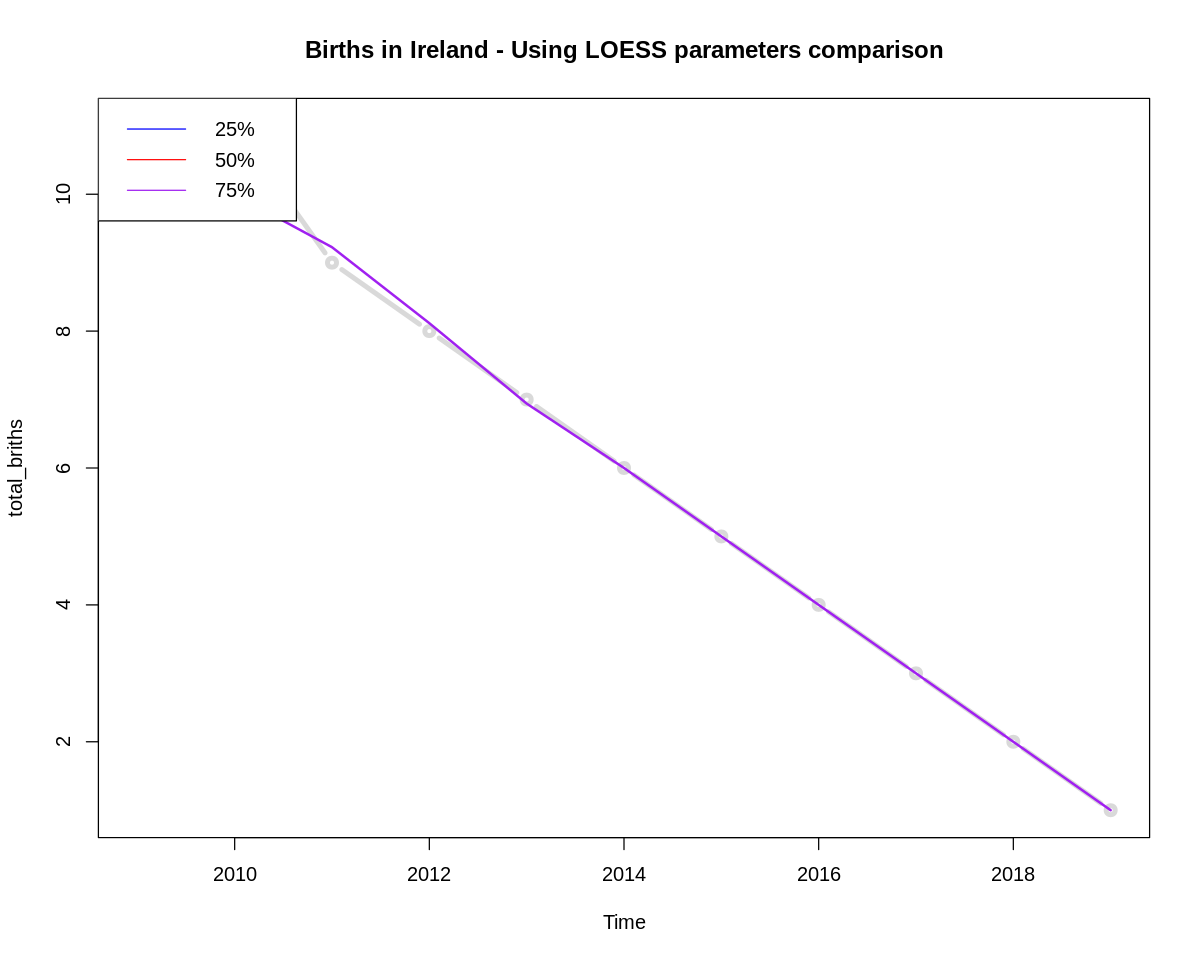

In [ ]:
loess_fit25 <- loess(as.matrix(values)~time.pts, data=values, span=0.25) 
loess_fit50 <- loess(as.matrix(values)~time.pts, data=values, span=0.5) 
smoothed.values.loess25 <- ts(fitted(loess_fit25), start=1977)
smoothed.values.loess50 <- ts(predict(loess_fit50), start=1977)
plot(values, type="b", lwd=4, col="gray85", main="Births in Ireland - Using LOESS parameters comparison")
lines(smoothed.values.loess25, col="blue", lwd=2, lty=1)
lines(smoothed.values.loess50, col="red", lwd=2)
lines(values.fit.loess, col="purple", lwd=2)
legend(x="topleft", c("25%","50%","75%"),lty = 1, col=c("blue","red","purple"))
19


Finding the optimal span to reduce the amount of error in the time series

In [ ]:
res.loess.75 <- sum(loess.fit$residuals^2)
res.loess.50 <- sum(loess_fit25$residuals^2)
res.loess.25 <- sum(loess_fit50$residuals^2)
sprintf("Residuals (SSE) at span 0.75: %f", res.loess.75)

[1] "Residuals (SSE) at span 0.75: 10.415354"

In [ ]:
sprintf("Residuals (SSE) at span 0.50: %f", res.loess.50)

[1] "Residuals (SSE) at span 0.50: 0.000000"

In [ ]:
sprintf("Residuals (SSE) at span 0.25: %f", res.loess.25)

[1] "Residuals (SSE) at span 0.25: 0.000000"

use of a function to return the residuals sse

In [ ]:
calcSSE <- function(x, dts=values){
sse =0
print("hello")
loessMod <- try(loess(as.matrix(dts) ~ time.pts, data=dts, span=x), silent=T)
print("here")
20
res <- try(loessMod$residuals, silent=T)
if(class(res)!="try-error"){
if((sum(abs(res), na.rm=T) > 0)){
sse <- sum(res^2)
print("over here")
}
} else{
sse <- 99999
print("no else")
}
return(sse)
}

In [ ]:
optimize(calcSSE, c(0.1, 0.75))

[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"
[1] "here"
[1] "over here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"
[1] "hello"


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.004375”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.12937”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.016738”


[1] "here"


$minimum
[1] 0.2534945

$objective
[1] 0

3.Decomposition

Create equally spaced time points for fitting trends

In [ ]:
time.pts = c(1:length(totals))
time.pts

In [ ]:
time.pts = c(time.pts - min(time.pts))/max(time.pts)
time.pts

using moving average method from forecast package

In [ ]:
ma.totals <- ma(totals, order=4, centre = FALSE)
ma.totals

In [ ]:
mav.fit = ksmooth(time.pts, totals, kernel = "box", bandwidth = 1.1)
totals.fit.mav = ts(mav.fit$y,start=2008,frequency=1)

In [ ]:
totals <- as.numeric(unlist(totals))
totals

define mav method and fit

In [ ]:
ts.plot(totals,xlim=c(2008, 2015), ylab="Number of marriages/births", main="Observed Values vs MA vs Kernel smoothing")
lines(ma.totals, lwd=2, lty=4, col="purple")
lines(totals.fit.mav, col="blue")
abline(totals.fit.mav[1],0,lwd=2,col="green")
legend(x="topleft", c("Observed", "MA", "K smoothing"), col=c("blue","green", "red"), lty=c(1, 4))

In [ ]:
loess.fit = loess(as.matrix(totals)~time.pts, degree=2)

totals.fit.loess = ts(fitted(loess.fit),start=2009)
#plot(values.fit.loess)

plot LOESS against observ and ma

In [ ]:
ts.plot(totals,ylab="Number of marriages/births", main="Observed Values vs MA vs LOESS")
lines(ma.totals,lwd=2, lty=4, col="violet")

legend(x="topleft", c("Observed", "MA", "LOESS"), col=c("gray10","violet", "red"), lty=c(1, 4))

In [ ]:
loess_fit25 <- loess(as.matrix(totals)~time.pts, data=totals, span=0.25) #25%smoothing span
loess_fit50 <- loess(as.matrix(totals)~time.pts, data=totals, span=0.5) #50%smoothing span
smoothed.totals.loess25 <- ts(fitted(loess_fit25), start=1977)
smoothed.totals.loess50 <- ts(predict(loess_fit50), start=1977)
plot(to, type="b", lwd=4, col="gray85", main="Number of marriages/births - LOESS parameters comparison")
lines(smoothed.totals.loess25, col="cyan", lwd=2, lty=1)
lines(smoothed.totals.loess50, col="coral", lwd=2)
lines(totals.fit.loess, col="plum", lwd=2)
legend(x="topleft", c("25%","50%","75%"),lty = 1, col=c("cyan","coral","plum"))
19


In [ ]:
res.loess.75 <- sum(loess.fit$residuals^2)
res.loess.50 <- sum(loess_fit25$residuals^2)
res.loess.25 <- sum(loess_fit50$residuals^2)

sprintf("Residuals (SSE) at span 0.75: %f", res.loess.75)

In [ ]:
## [1] "Residuals (SSE) at span 0.75: 14737870.042897"
sprintf("Residuals (SSE) at span 0.50: %f", res.loess.50)

In [ ]:
## [1] "Residuals (SSE) at span 0.50: 287856.406508"
sprintf("Residuals (SSE) at span 0.25: %f", res.loess.25)

In [ ]:
# [1] "Residuals (SSE) at span 0.25: 4232049.516755"

define function that returns the SSE

In [ ]:
calcSSE <- function(x, dts=values){
  sse =0
  print("hello")
  loessMod <- try(loess(as.matrix(dts) ~ time.pts, data=dts, span=x), silent=T)
  print("here")
  res <- try(loessMod$residuals, silent=T)
  if(class(res)!="try-error"){
    if((sum(abs(res), na.rm=T) > 0)){
      sse <- sum(res^2)
      print("over here")
    }
  } else{
  sse <- 99999
  print("no else")
  }
  return(sse)
}

optimize(calcSSE, c(0.1, 0.75))

Detrend

In [ ]:
plot(cbind(ma.totals, smoothed.totals.loess50), main = "Trend Component")

plot LOESS against observ and ma

In [ ]:
ts.plot(totals,ylab="# Number of Marriages/births", main="Observed Values vs MA vs LOESS")
lines(ma.totals,lwd=2, lty=4, col="violet")
lines(smoothed.totals.loess50, col="red")
legend(x="topleft", c("Observed", "MA (order 4)", "LOESS (span 0.5)"), col=c("gray10","violet", "red")

In [ ]:
totals.rand.ma <- totals-ma.totals
totals.rand.loess <- ts(loess_fit50$residuals, start = 2008)
plot(totals.rand.loess, col="tomato", pty="l", main="Random component", ylim=c(80000, -80000))
lines(values.rand.ma, lty=2)
legend(x="topleft", legend=c("Total - MA estimated trend", "Total - LOESS estimated trend"),
col=c("gray15", "tomato"), lty=c(2, 1))
23

Arima

In [ ]:
acf(totals_diff2)

In [ ]:
pacf(totals_diff2)

In [ ]:
#Auto Arima
auto.arima(values)

In [ ]:
kpss.test(totals_diff1)

In [ ]:
p.test(totals_diff1)

In [ ]:
par(mfrow=c(2,1))
pacf(totals_diff1)
acf(totals_diff1)

In [ ]:
totals.fit.arima1_1_0 <- auto.arima(totals)
totals.fit.arima1_2_0 <- arima(totals, order=c(1,2,0))
totals.fit.arima0_2_1 <- arima(totals, order=c(0,2,1))
summary(totals.fit.arima1_1_0)

In [ ]:
accuracy(totals.fit.arima1_1_0)

arima 110 residuals analysis

In [ ]:
par(mfrow=c(2, 2))
acf(totals.fit.arima1_1_0$residuals)
pacf(totals.fit.arima1_1_0$residuals)
plot(totals.fit.arima1_1_0$residuals)
qqnorm(totals.fit.arima1_1_0$residuals)
qqline(totals.fit.arima1_1_0$residuals, col="cyan")

In [ ]:
summary(totals.fit.arima1_2_0)

In [ ]:
accuracy(totals.fit.arima1_2_0)

arima 120 residuals analysis

In [ ]:
par(mfrow=c(2,2))
acf(totals.fit.arima1_2_0$residuals)
pacf(totals.fit.arima1_2_0$residuals)
plot(totals.fit.arima1_2_0$residuals)
qqnorm(totals.fit.arima1_2_0$residuals)
qqline(totals.fit.arima1_2_0$residuals, col="cyan")

In [ ]:
totals.fit.arima0_2_2 <- arima(totals, order=c(0,2,2)) #holt
totals.fit.arima0_2_4 <- arima(totals, order=c(0,2,4))
summary(totals.fit.arima0_2_2)

In [ ]:
accuracy(totals.fit.arima0_2_2)

In [ ]:
# BIC
AIC(totals.fit.arima0_2_2, k=log(length(totals))